# 시각화 (Visualization) 과제

In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

다음 블로그에 있는 시각화 예시와 데이터셋을 이용해서 시각화를 구현해본다.

https://towardsdatascience.com/10-viz-every-ds-should-know-4e4118f26fc3

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

## 1. 히스토그램 (Histograms)

### 1) 데이터 읽기

In [4]:
dataset_path = "data/thermostat_rebates_by_zip_1000.csv"
dataset = pd.read_csv(dataset_path)

dataset.tail()

,zip-code,rebate-usd,lat,lng,median-household-income,mean-household-income,population
995,40385,100,37.758499,-84.132959,43280,51428,3131
996,72433,100,36.030397,-91.049037,31934,36651,3067
997,90014,67,34.043478,-118.251931,13832,30121,7005
998,8021,90,39.807377,-75.002697,55858,63779,45515
999,68067,100,42.152506,-96.471658,39062,51461,1397


In [5]:
rebate = dataset["rebate-usd"]
print(rebate)

0       88
1       88
2      100
3      100
4      100
      ... 
995    100
996    100
997     67
998     90
999    100
Name: rebate-usd, Length: 1000, dtype: int64


### 2) 시각화

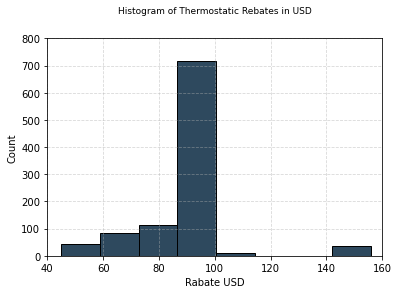

In [6]:
n, bins, patches = plt.hist(rebate,
8,
facecolor="#2E495E",
edgecolor=(0, 0, 0),
align='mid',
)
# align은 tick과 막대의 위치를 조절합니다. 
#디폴트는 ‘center’인데 ‘edge’로 설정하면 
#막대의 아래쪽 끝에 y_tick이 표시됩니다.

plt.axis([40,160,0,800])    # 축 범위 지정 [x min,x max , y min,y max]
plt.grid(True, alpha=0.5, linestyle='--')  # 격자 grid 생성
title_font = {
    'fontsize' : 9
}
plt.title("Histogram of Thermostatic Rebates in USD",title_font,pad=25)
plt.xlabel("Rabate USD")
plt.ylabel("Count")
plt.show()


## 2. 막대/파이 차트 (Bar/Pie charts)

### 1) 데이터 읽기

In [7]:
dataset_path = "data/drugs_data.csv"
dataset = pd.read_csv(dataset_path)

dataset.tail()

,Age,Sex,BP,Cholesterol,NA_to_K,Drug
195,56,F,LOW,HIGH,11.566830,drugC
196,16,M,LOW,HIGH,12.006286,drugC
197,52,M,NORMAL,HIGH,9.894478,drugX
198,23,M,NORMAL,NORMAL,14.019550,drugX
199,40,F,LOW,NORMAL,11.348969,drugX


In [8]:
BP = dataset["BP"].value_counts()
BP


HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

### 2) 시각화

#### 막대 그래프

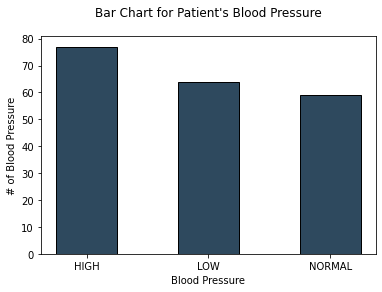

In [9]:
plt.bar(BP.keys(),
        BP,                                  # Give each bar its correct height
        0.5,                                 # Give each bar a width of 0.5
        facecolor="#2E495E",
        edgecolor=(0, 0, 0)                  # Black edges for each bar
       )
# align은 tick과 막대의 위치를 조절합니다. 
#디폴트는 ‘center’인데 ‘edge’로 설정하면 
#막대의 아래쪽 끝에 y_tick이 표시됩니다.


#plt.grid(True, alpha=0.5, linestyle='--')  # 격자 grid 생성

plt.title("Bar Chart for Patient's Blood Pressure", loc='center', pad=20)
#for loc; supported values are 'left', 'center', 'right'


plt.xlabel("Blood Pressure")
plt.ylabel("# of Blood Pressure")

plt.show()

#### 파이 그래프

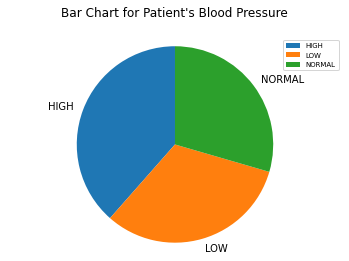

In [10]:
plt.pie(BP,labels=BP.keys(),startangle=90)
plt.title("Bar Chart for Patient's Blood Pressure",pad=20)   
                                            # loc='center',pad =20
plt.axis('equal')
plt.legend(loc=1,fontsize=7)     #Location String 'upper right' =1  
                                # legend의 폰트 사이즈 조절 가능
plt.show()

## 3. 산점도/직선 그래프 (Scatter/Line plots)

### 1) 데이터 읽기

In [11]:
dataset_path = "data/square-feet_and_house-price.csv"
dataset = pd.read_csv(dataset_path)

dataset.tail()



,square-feet,house-price
70,14000.0,8.678987
71,14200.0,6.636067
72,14400.0,8.787156
73,14600.0,9.358178
74,14800.0,7.071544


### 2) 시각화

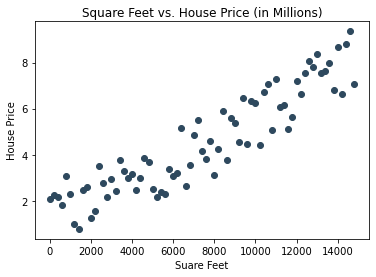

In [12]:
sq = dataset["square-feet"]
sq
hp = dataset["house-price"]
hp
plt.scatter(sq,hp,facecolor="#2E495E")

plt.title("Square Feet vs. House Price (in Millions)",pad=5)   
                                # loc='center',pad =20
plt.xlabel("Suare Feet")
plt.ylabel("House Price")
plt.show()

## 4. 시계열 그래프 (Time series plot)

### 1) 데이터 읽기

In [13]:
dataset_path = "data/tesla_stock.csv"
dataset = pd.read_csv(dataset_path)

dataset.tail()

,Date,Open,High,Low,Close,Volume
749,2015-01-08,212.81,213.7999,210.0100,210.615,3442509.0
750,2015-01-07,213.35,214.7800,209.7800,210.950,2968390.0
751,2015-01-06,210.06,214.2000,204.2100,211.280,6261936.0
752,2015-01-05,214.55,216.5000,207.1626,210.090,5368477.0
753,2015-01-02,222.87,223.2500,213.2600,219.310,4764443.0


In [14]:
sorted_dataset = dataset.sort_values(by='Date')
sorted_dataset.tail()

,Date,Open,High,Low,Close,Volume
4,2017-12-22,329.51,330.9214,324.82,325.20,4186131.0
3,2017-12-26,323.83,323.9400,316.58,317.29,4321909.0
2,2017-12-27,316.00,317.6800,310.75,311.64,4645441.0
1,2017-12-28,311.75,315.8200,309.54,315.36,4294689.0
0,2017-12-29,316.18,316.4100,310.00,311.35,3727621.0


### 2) 시각화

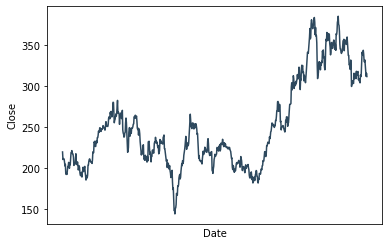

In [15]:

Dt = sorted_dataset["Date"]
Cl = sorted_dataset["Close"]
plt.xticks([])     # x축 표시 안함
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(Dt,Cl,color="#2E495E")
